# Проект "Анализ взаимодействия пользователей с карточками Яндекс.Дзен" 

### Содержание:

1. [Выгрузка данных.](#intro) 
2. [Предобработка данных.](#intro1) 
3. [Сохранение полученных данных в файл.](#intro2)
4. [Дашборд.](#intro3)
4. [Презентация.](#intro4)

## 1.Выгрузка данных. <a id='intro'></a>

In [1]:
# импортирование библиотек,
# присоединение к базе данных,
# выгрузка данных из таблицы БД,
# сохранение в переменную dash_visits и
# просмотр первых 15 значений

import pandas as pd

import matplotlib.pyplot as plt 

from sqlalchemy import create_engine

db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string) 


query = '''
        SELECT *
        FROM dash_visits
        '''


dash_visits = pd.io.sql.read_sql(query, con = engine)

dash_visits.head(15)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


In [2]:
# получение общей информации о данных
# из таблицы dash_visits

dash_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


In [3]:
dash_visits.describe()

,record_id,visits
count,3.074500e+04,30745.000000
mean,1.055969e+06,10.089673
std,8.875461e+03,19.727601
min,1.040597e+06,1.000000
25%,1.048283e+06,1.000000
50%,1.055969e+06,3.000000
75%,1.063655e+06,10.000000
max,1.071341e+06,371.000000


Итак, в таблице `dash_visits` 6 столбцов. Типы данных - `datetime`, `int` и `object`.

Согласно документации к данным:
* `record_id` — первичный ключ;
* `item_topic` — тема карточки;
* `source_topic` — тема источника;
* `age_segment` — возрастной сегмент;
* `dt` — дата и время;
* `visits` — количество событий.

Также по представленной информации мы видим, что пропуски отсуствуют в данных, названия столбцов указаны верно. Далее необходимо проверить данные на явные и неявные дубликаты, а также на возможные аномалии.

## 2.Предобработка данных. <a id='intro1'></a>

In [4]:
# получение информации об описательных статиcтических данных
# в таблице dash_visits

dash_visits.duplicated().sum()

0

In [5]:
# получение уникальных значений 
# столбца 'record_id'

dash_visits['record_id'].value_counts()

1040597    1
1060774    1
1061102    1
1061101    1
1061100    1
          ..
1050841    1
1050840    1
1050839    1
1050838    1
1071341    1
Name: record_id, Length: 30745, dtype: int64

In [6]:
# получение уникальных значений 
# столбца 'item_topic'

dash_visits['item_topic'].unique()

array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

In [7]:
# получение уникальных значений 
# столбца 'source_topic'

dash_visits['source_topic'].unique()

array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

In [8]:
# получение уникальных значений 
# столбца 'age_segment'

dash_visits['age_segment'].unique()

array(['18-25', '26-30', '31-35', '36-40', '41-45', '45+'], dtype=object)

In [9]:
# получение количества уникальных значений 
# столбца 'age_segment'

dash_visits['age_segment'].value_counts()

18-25    7056
26-30    5875
31-35    5552
36-40    5105
41-45    3903
45+      3254
Name: age_segment, dtype: int64

In [10]:
# получение уникальных значений 
# столбца 'dt'

sorted(dash_visits['dt'].unique())

[numpy.datetime64('2019-09-24T18:28:00.000000000'),
 numpy.datetime64('2019-09-24T18:29:00.000000000'),
 numpy.datetime64('2019-09-24T18:30:00.000000000'),
 numpy.datetime64('2019-09-24T18:31:00.000000000'),
 numpy.datetime64('2019-09-24T18:32:00.000000000'),
 numpy.datetime64('2019-09-24T18:33:00.000000000'),
 numpy.datetime64('2019-09-24T18:34:00.000000000'),
 numpy.datetime64('2019-09-24T18:35:00.000000000'),
 numpy.datetime64('2019-09-24T18:52:00.000000000'),
 numpy.datetime64('2019-09-24T18:53:00.000000000'),
 numpy.datetime64('2019-09-24T18:54:00.000000000'),
 numpy.datetime64('2019-09-24T18:55:00.000000000'),
 numpy.datetime64('2019-09-24T18:56:00.000000000'),
 numpy.datetime64('2019-09-24T18:57:00.000000000'),
 numpy.datetime64('2019-09-24T18:58:00.000000000'),
 numpy.datetime64('2019-09-24T18:59:00.000000000'),
 numpy.datetime64('2019-09-24T19:00:00.000000000')]

In [11]:
# получение уникальных значений 
# столбца 'visits'

dash_visits['visits'].unique()

array([  3,   1,   4,  17,  27,  22,  24,  20,   5,  13,  18,  15,  10,
         9,  14,  11,   6,   8,   7,   2,  23,  33,  66,  72,  71,  61,
        12,  25,  42,  30,  16,  21,  38,  43,  44,  19,  79,  74,  82,
        47,  46,  57,  29,  34,  31,  51,  98,  89,  41,  77,  96,  86,
        85,  35,  32,  36,  28,  60,  63,  55,  65, 101,  92,  95,  26,
        56,  49,  54,  69,  78,  75,  68,  50,  94, 119, 111,  53,  58,
        59,  45,  40, 165, 164, 136, 128,  48,  39,  52,  37,  88, 133,
       106, 108, 149, 169, 178, 153,  64,  70,  80,  83, 102,  90, 142,
       152, 182, 143,  73, 104,  62,  67, 121, 209, 228, 218, 183,  76,
       186, 200, 206, 219,  84, 185, 207, 100, 110, 105, 202, 184, 168,
       132, 126, 211, 197, 180, 113, 107, 115, 103, 141, 235, 177,  91,
       123, 135, 116, 125, 127,  97, 130, 114,  99,  87, 139, 145, 147,
       124, 137, 264, 276, 231, 112, 163, 138, 158, 160, 166, 155, 118,
        81, 120, 109, 173, 266, 331, 291, 324, 144, 190, 201, 21

In [12]:
# получение количества уникальных значений 
# столбца 'id'

dash_visits['visits'].value_counts()

1      8999
2      4304
3      2637
4      1879
5      1359
       ... 
331       1
291       1
324       1
190       1
146       1
Name: visits, Length: 212, dtype: int64

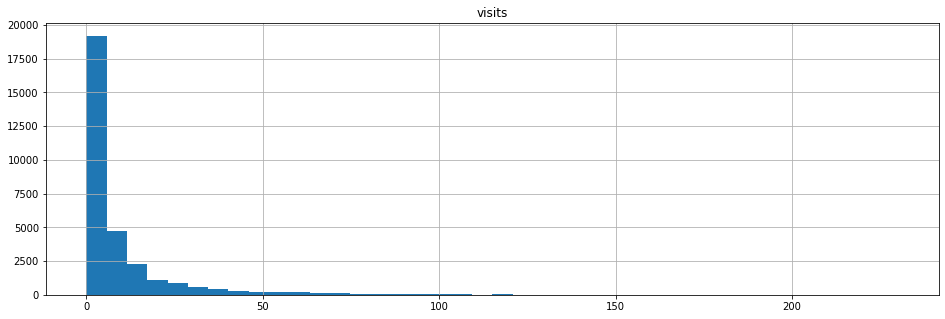

In [13]:
# построение гистограммы для столбца 'visits'

dash_visits.hist('visits', figsize = (16,5), range = (0, 230), bins = 40)
plt.show()

Как мы видим, в данных отсутствуют явные и неявные дубликаты, формат данных также указан верный. Единственное мы заметили подъем у значений с `1` и где то до `20`. Однако, не будем пока ничего менять и оставим как есть. Далее необходимо сохранить выгруженные данные в файл для дальнейшего построения дашборда.

## 3.Сохранение полученных данных в файл. <a id='intro2'></a>

In [14]:
# сохранение таблицы dash_visits в 
# файл 'dash_visits.csv'

dash_visits.to_csv('dash_visits.csv', index = False)

In [15]:
# чтение файла и
# сохранение в переменную df

df = pd.read_csv('dash_visits.csv')

In [16]:
# просмотр первых 5 значений таблицы df

df.head()

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


## 4. Дашборд. <a id='intro3'></a>

Ссылка на дашборд: https://public.tableau.com/app/profile/maya4053/viz/__16493431385270/sheet0?publish=yes

## 5. Презентация. <a id='intro4'></a>

Ссылка на презентацию: https://drive.google.com/file/d/1o5FXDE0XnHHAOEkQ4MjTnVTrkTMxx6Bk/view?usp=sharing